# Moving Average Ribbon

https://www.investopedia.com/terms/m/movingaverageribbon.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'msft'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00-05:00,158.779999,160.729996,158.330002,160.619995,155.761810,22622100
2020-01-03 00:00:00-05:00,158.320007,159.949997,158.059998,158.619995,153.822296,21116200
2020-01-06 00:00:00-05:00,157.080002,159.100006,156.509995,159.029999,154.219894,20813700
2020-01-07 00:00:00-05:00,159.320007,159.669998,157.320007,157.580002,152.813766,21634100
2020-01-08 00:00:00-05:00,158.929993,160.800003,157.949997,160.089996,155.247818,27746500


In [3]:
df['MA10'] = df['Adj Close'].rolling(10).mean()
df['MA20'] = df['Adj Close'].rolling(20).mean()
df['MA30'] = df['Adj Close'].rolling(30).mean()
df['MA40'] = df['Adj Close'].rolling(40).mean()
df['MA50'] = df['Adj Close'].rolling(50).mean()
df['MA60'] = df['Adj Close'].rolling(60).mean()

In [4]:
import talib as ta

In [5]:
df['SMA5'] = ta.SMA(df['Adj Close'], timeperiod=5)
df['SMA15'] = ta.SMA(df['Adj Close'], timeperiod=15)
df['SMA25'] = ta.SMA(df['Adj Close'], timeperiod=25)
df['SMA35'] = ta.SMA(df['Adj Close'], timeperiod=35)
df['SMA45'] = ta.SMA(df['Adj Close'], timeperiod=45)

In [6]:
df['EMA5'] = ta.EMA(df['Adj Close'], timeperiod=5)
df['EMA15'] = ta.EMA(df['Adj Close'], timeperiod=15)
df['EMA25'] = ta.EMA(df['Adj Close'], timeperiod=25)
df['EMA35'] = ta.EMA(df['Adj Close'], timeperiod=35)
df['EMA45'] = ta.EMA(df['Adj Close'], timeperiod=45)

Text(0, 0.5, 'Price')

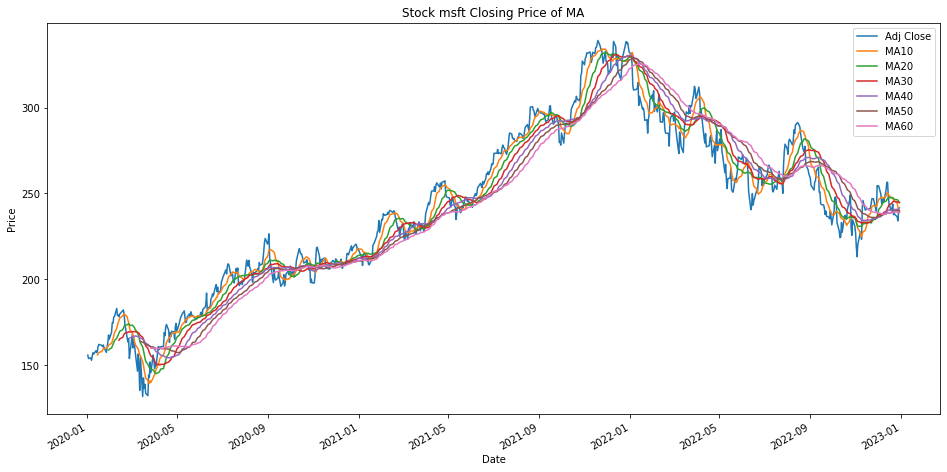

In [9]:
# Line Chart
df[['Adj Close', 'MA10', 'MA20', 'MA30', 'MA40', 'MA50', 'MA60']].plot(figsize=(16,8))
plt.title('Stock '+ symbol +' Closing Price of MA')
plt.xlabel('Date')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

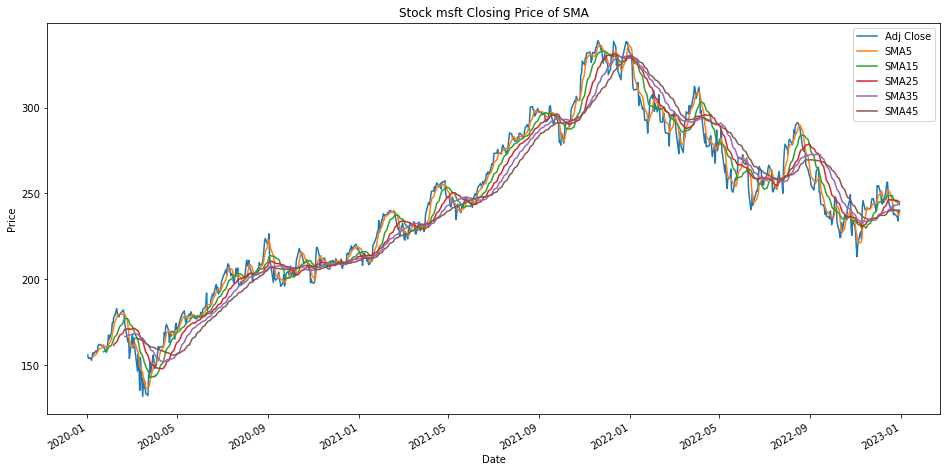

In [10]:
df[['Adj Close', 'SMA5', 'SMA15', 'SMA25', 'SMA35', 'SMA45']].plot(figsize=(16,8))
plt.title('Stock '+ symbol +' Closing Price of SMA')
plt.xlabel('Date')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

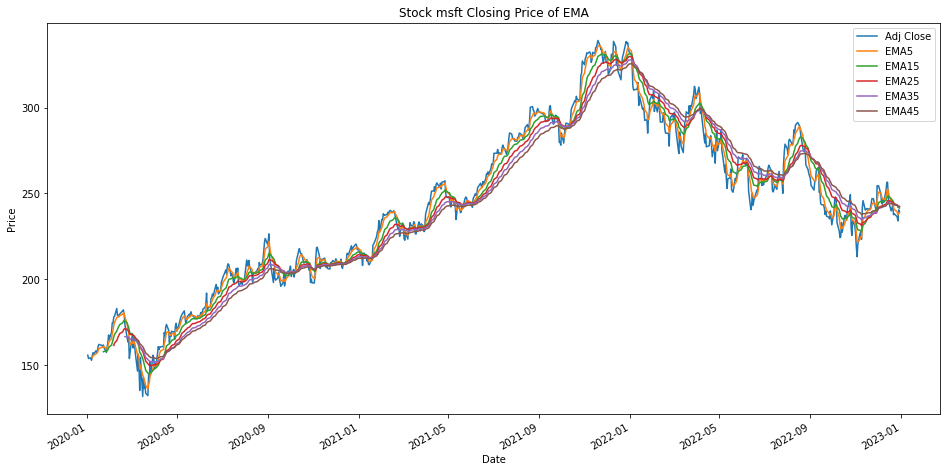

In [11]:
df[['Adj Close', 'EMA5', 'EMA15', 'EMA25', 'EMA35', 'EMA45']].plot(figsize=(16,8))
plt.title('Stock '+ symbol +' Closing Price of EMA')
plt.xlabel('Date')
plt.ylabel('Price')

In [12]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA20,MA30,...,SMA15,SMA25,SMA35,SMA45,EMA5,EMA15,EMA25,EMA35,EMA45,VolumePositive
0,18263.208333,158.779999,160.729996,158.330002,160.619995,155.761810,22622100,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,18264.208333,158.320007,159.949997,158.059998,158.619995,153.822296,21116200,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,18267.208333,157.080002,159.100006,156.509995,159.029999,154.219894,20813700,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,18268.208333,159.320007,159.669998,157.320007,157.580002,152.813766,21634100,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,18269.208333,158.929993,160.800003,157.949997,160.089996,155.247818,27746500,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,154.373117,NaN,NaN,NaN,NaN,False


Text(0, 0.5, 'Price')

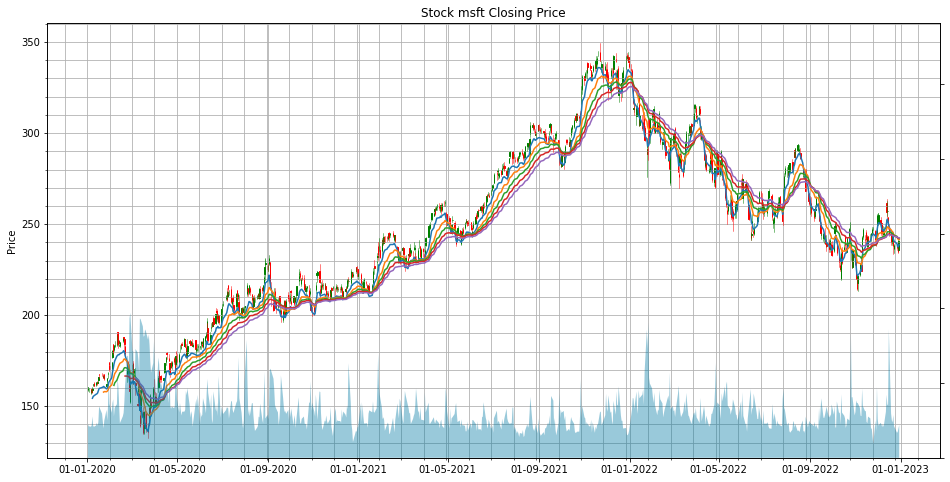

In [14]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(111)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(dfc.Date, dfc[['EMA5', 'EMA15', 'EMA25', 'EMA35', 'EMA45']])
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
ax1v.fill_between(dfc.Date, 0, dfc.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')